<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/FindImportantPoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Example for Finding peak using Scipy.signal

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

x = electrocardiogram()[2000:4000]


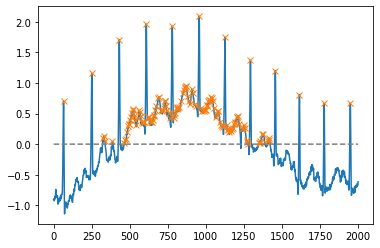

In [2]:
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x),"--", color="gray")
plt.show()

[186 180 177 171 177 169 167 164 158 162 172]


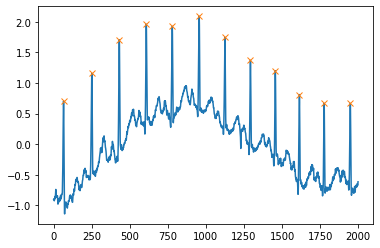

In [3]:
peaks, _ = find_peaks(x, distance=150)
print(np.diff(peaks))

plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

0.5049999999999999


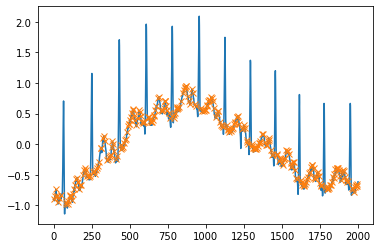

In [4]:
peaks, properties = find_peaks(x, prominence=(None, 0.6))
print(properties["prominences"].max())
plt.plot(x)
plt.plot(peaks, x[peaks],"x")
plt.show()

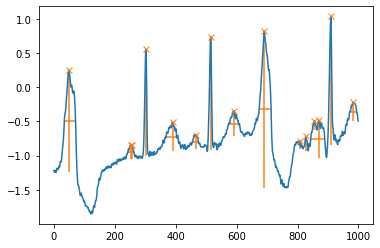

In [5]:
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=0.1, width=2)
properties["prominences"], properties["widths"]

plt.plot(x)
plt.plot(peaks, x[peaks],  "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")

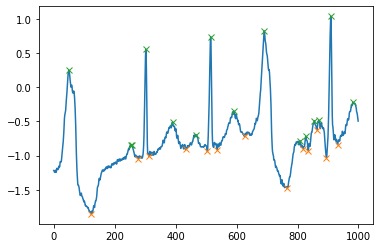

In [6]:
def find_peak_set(x, prominence = 0.1, width = 2):
  max, _ = find_peaks(x, prominence= prominence, width=width)
  min, _ = find_peaks(-x, prominence= prominence, width=width)
  return min, max

min, max = find_peak_set(x)
plt.plot(x)
plt.plot(min, x[min], 'x')
plt.plot(max, x[max],'x')

## This code to implement compressed searching similarity in the book "Data Mining In Time Series Databases", 2004, Marj Last et al.
- Three functions are implemented
  * Find_First
  * Find_Min
  * Find_Max



## Alogrithm

In [7]:
## Find the first important point fucntion
## input: set of points
## output: indices of the first important points
minSet = []
maxSet = []
peakSet = []
def Find_Important(a, R):
  a1 = a - a.min() + 0.000001 ##remove the 0 problems
  if len(a) != 0:
    peakSet.append(0);

  k = Find_First(a1, R)
  #print(k)
  if k < len(a1) and a1[k]> a1[0]:
    k = Find_Maximum(a1, R, k)
    #print(k)
  while (k < len(a1)):
    k = Find_Minimum(a1, R, k);
    #print(k)
    k = Find_Maximum(a1, R, k);
    #print(k)
  peakSet.append(len(a1)-1)
  return peakSet

def Find_First(a, R):
  
  n = len(a) ;
  if n == 0:
    return -1
  else:
    iMin = 1; iMax = 1; i =2
    while i < n and (a[i]/a[iMin]) < R and (a[iMax]/a[i]) < R:
      if a[i] < a[iMin]: 
        iMin = i;
      if a[i] > a[iMax]:
        iMax = i;
      i = i + 1
    if iMin < iMax:
      minSet.append(iMin)
      peakSet.append(iMin)
    else:
      maxSet.append(iMax)
      peakSet.append(iMax)
  return i
  
def Find_Minimum(a, R, i):
  n = len(a)
  if i == n:
    return n
  iMin = i
  while i < n and (a[i]/a[iMin]) < R:
    if a[i] < a[iMin]:
      iMin = i;
    i = i + 1;
  if i == n:
    return i
  if i<n or a[iMin] < a[i]:
    minSet.append(iMin)
    peakSet.append(iMin)
  return i

def Find_Maximum(a, R, i):
  n = len(a)
  if i == n:
    return n
  iMax = i
  while i < n and (a[iMax]/a[i]) < R:
    if a[i] > a[iMax]:
      iMax = i;
    i = i + 1;
  if i == n:
    return i
  if i<n or a[iMax] > a[i]:
    maxSet.append(iMax)
    peakSet.append(iMax)
  return i
### Find important point




In [192]:
type(x)

numpy.ndarray

In [193]:
x.max()

2.09

In [8]:
Find_First(x, R=1.5)

43

### Print out the set of important peaks

In [9]:
minSet = []
maxSet = []
peakSet = []
peakSet = Find_Important(x, R= 1.9)
print(peakSet, minSet, maxSet)

[0, 3, 49, 122, 124, 127, 302, 312, 515, 536, 691, 764, 909, 999] [3, 122, 127, 312, 536, 764] [49, 124, 302, 515, 691, 909]


In [ ]:
x + x.min()

-1.14

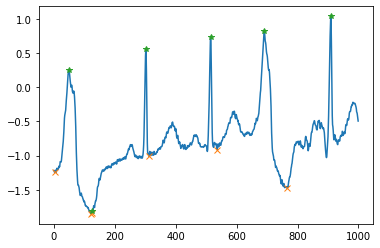

In [10]:
#plt.figure(figsize=(20, 20))

plt.plot(x)
plt.plot(minSet, x[minSet], 'x')
plt.plot(maxSet, x[maxSet], '*')


### Test PPG signals

### Import data

In [15]:
import pandas as pd
ppg  = pd.read_csv('nomarlcun2.csv')

In [16]:
ppg.describe()

,850nm,640nm,940nm,580nm,Channel 5,Channel 6,Channel 7,Channel 8
count,9355.000000,9.355000e+03,9355.000000,9.355000e+03,9355.0,9355.0,9355.0,9355.0
mean,552225.270551,-1.162078e+06,499284.498450,-1.451411e+06,0.0,0.0,0.0,0.0
std,21014.353419,1.829957e+03,29340.394882,7.101684e+03,0.0,0.0,0.0,0.0
min,504256.000000,-1.167040e+06,425817.000000,-1.464760e+06,0.0,0.0,0.0,0.0
25%,536302.000000,-1.163420e+06,476826.500000,-1.457615e+06,0.0,0.0,0.0,0.0
50%,551566.000000,-1.162120e+06,498578.000000,-1.452200e+06,0.0,0.0,0.0,0.0
75%,567222.500000,-1.160960e+06,521113.000000,-1.445580e+06,0.0,0.0,0.0,0.0
max,614159.000000,-1.156610e+06,584479.000000,-1.430970e+06,0.0,0.0,0.0,0.0


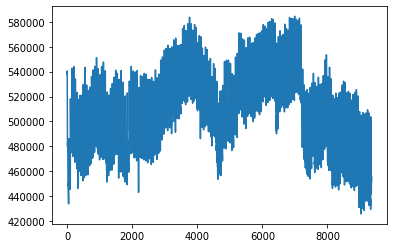

In [17]:
x = ppg['940nm']
plt.plot(x)

In [18]:
### Extracting prominent peaks 
minSet1 = []
maxSet1 = []
peakSet1 = []
peakSet2 = []
peakSet1 = Find_Important(ppg['940nm'], R= 1.5)
peakSet2 = Find_Important(ppg['850nm'], R= 1.5)
#print(peakSet, minSet, maxSet)

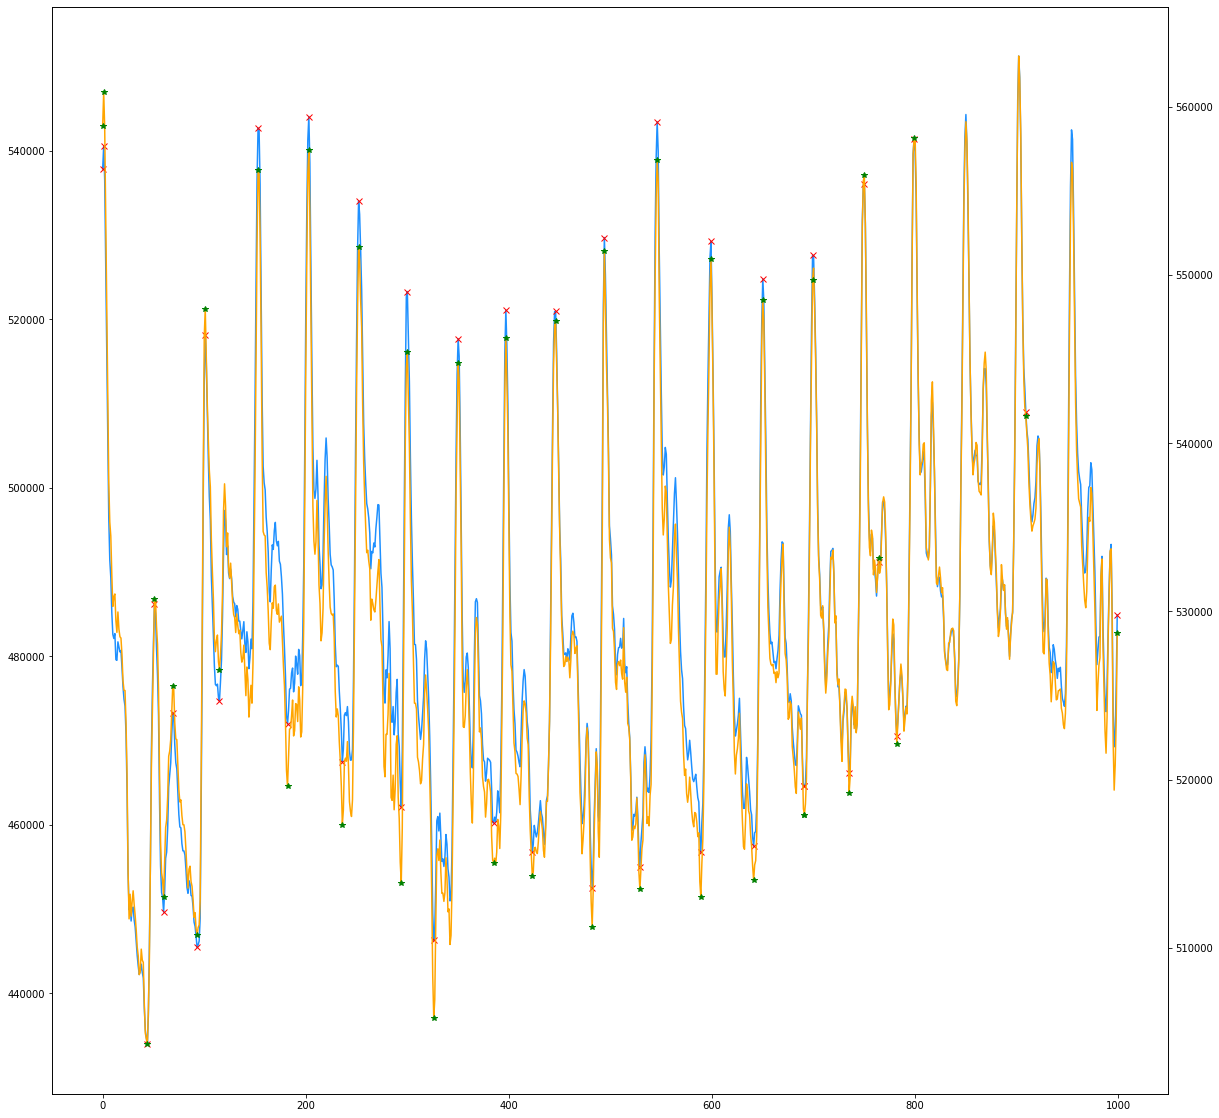

In [19]:
### Plot data
#plt.figure()
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(ppg['940nm'][0:1000], color= 'dodgerblue')
#t= range(50)
pk1 = peakSet1[10:50]
ax.plot(pk1, ppg['940nm'][pk1], 'rx')
ax2 = ax.twinx()

pk2 = peakSet2[10:50]
ax2.plot(ppg['850nm'][0:1000], color= 'orange')
ax2.plot(pk2, ppg['850nm'][pk2], 'g*')

fig.savefig('peaks.png', format='png', dpi=300)

In [20]:
len(peakSet1), len(peakSet2)

(747, 747)

# import data

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
ppg  = pd.read_csv('nomarlguan1.csv')

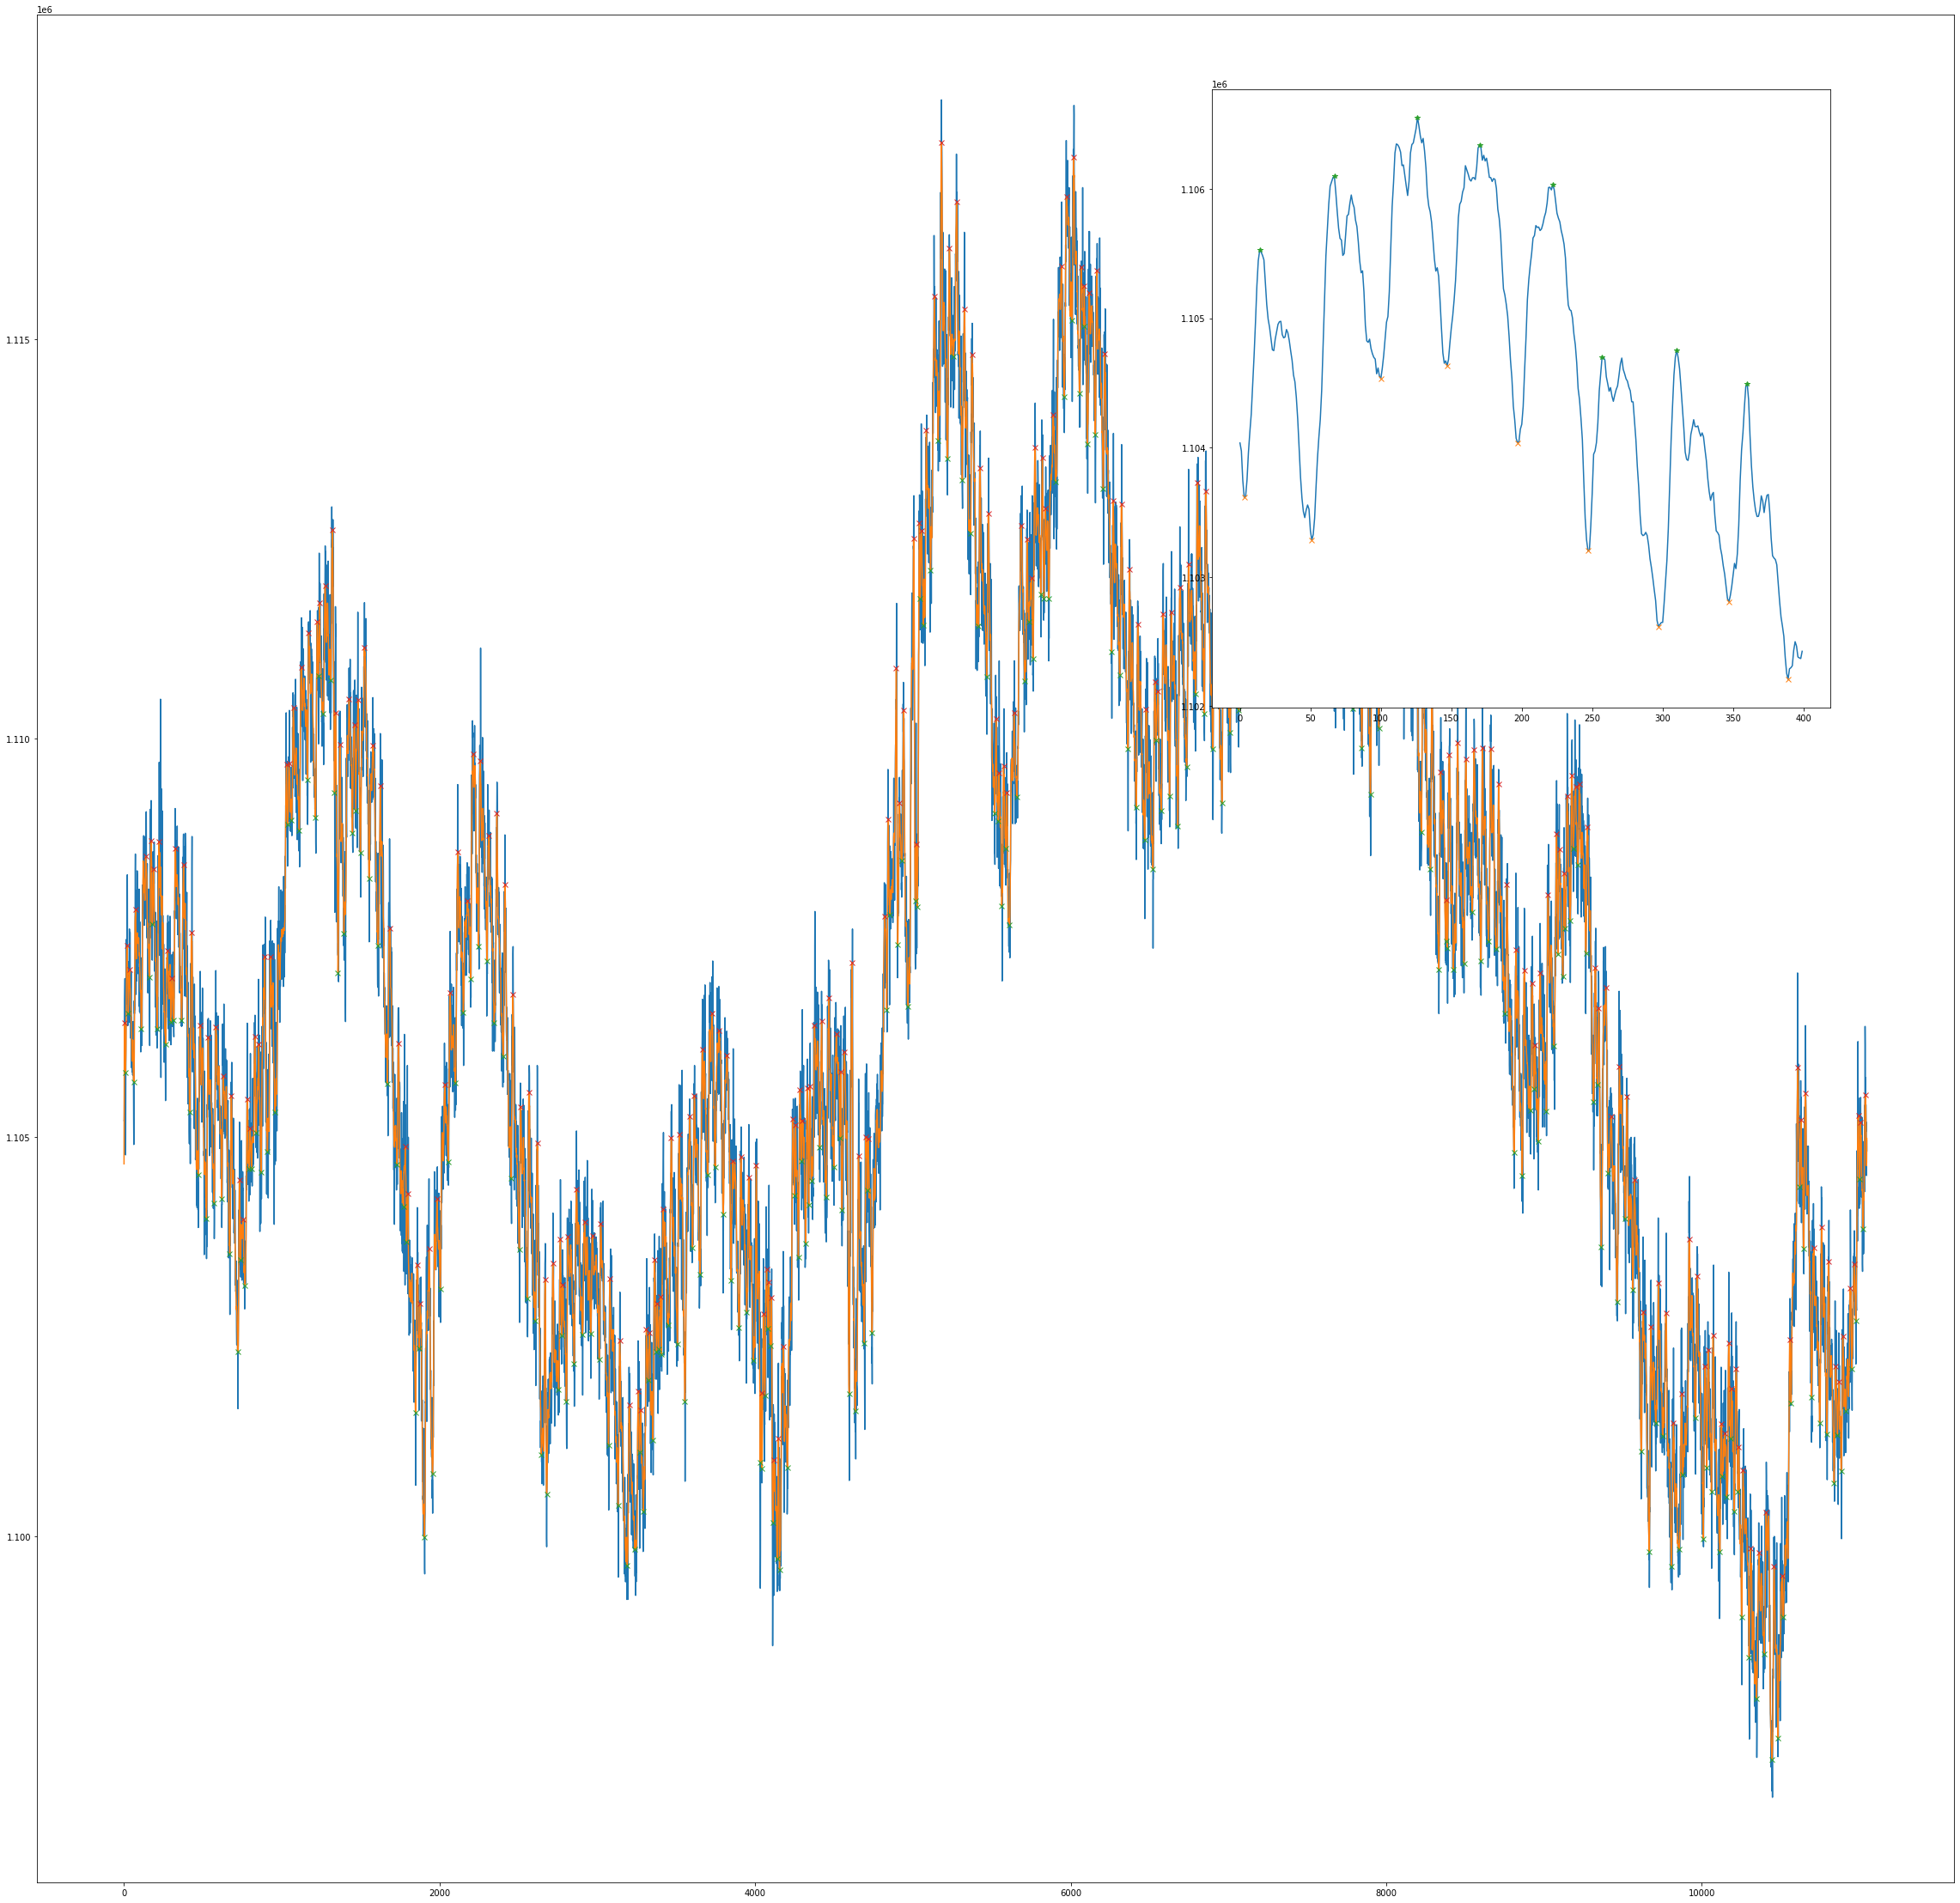

In [210]:
from scipy.signal import savgol_filter
def find_peak_set(x, prominence = 0.1, width = 2):
  max, _ = find_peaks(x, prominence= prominence, width=width)
  min, _ = find_peaks(-x, prominence= prominence, width=width)
  return min, max

x = -ppg['580nm']
xfilt = savgol_filter(x,21,5)
min, max = find_peak_set(xfilt, prominence= 500)

plt.figure(figsize=(40,40))
plt.plot(x)
plt.plot(xfilt)
plt.plot(min, xfilt[min], 'x')
plt.plot(max, xfilt[max],'x')

start = 3600
stop = 4000
xdetail = xfilt[start:stop]

submin = [i - start for i in min if i >= start and i <= stop]
submax = [i - start for i in max if i >= start and i <= stop]
sub_axes = plt.axes([.6, .6, .25, .25]) 
sub_axes.plot(xdetail) 
sub_axes.plot(submin, xdetail[submin], 'x') 
sub_axes.plot(submax, xdetail[submax], '*') 

In [157]:
PT = np.diff(min)
PT

array([21, 30, 20, 30, 19, 31, 21, 29, 52, 23, 30, 20, 30, 20, 32, 53, 52,
       20, 29, 21, 28, 50, 51, 48, 48, 22, 29, 20, 29, 49, 21, 29, 20, 27,
       21, 27, 21, 30, 20, 31, 20, 29, 20, 27, 25, 22, 46, 20, 26, 21, 28,
       20, 36, 58, 59, 60, 60, 23, 35, 22, 34, 21, 30, 20, 30, 19, 31, 20,
       27, 23, 25, 19, 27, 21, 29, 22, 31, 20, 33, 50, 51, 22, 30, 21, 29,
       53, 50, 22, 27, 21, 26, 21, 29, 22, 27, 52, 20, 33, 20, 34, 58, 21,
       40, 60, 20, 35, 23, 31, 51, 54, 50, 23, 28, 48, 21, 30, 46, 23, 26,
       20, 26, 21, 29, 22, 29, 51, 50, 21, 27, 37, 10, 20, 28, 21, 27, 19,
       27, 19, 24, 22, 24, 20, 26, 20, 25, 21, 23, 21, 23, 45, 21, 18, 10,
       48, 42, 55, 21, 28, 19, 28, 20, 27, 19, 20, 30, 28, 22, 17, 28, 29,
       46, 23, 24, 22, 18, 31, 27, 23, 23, 24, 24, 50, 52, 20, 33, 50, 22,
       24, 21, 28, 20, 30, 50, 21, 27, 21, 28, 22, 28, 22, 28, 22, 28, 47,
       23, 27, 20, 28, 22, 28, 52, 52, 21, 31, 51, 53, 54, 53, 22, 30, 52,
       54, 55, 55, 24, 31

## Take second-order derevative

In [93]:
d1x = np.diff(xfilt)
dydx = np.gradient(xfilt,1)
d1x, dydx

(array([  480.05159623, -2496.6173769 , -4189.8729017 , ...,
          949.13189099,  -397.07593093, -2672.86798419]),
 array([  480.05159623, -1008.28289034, -3343.2451393 , ...,
          276.02798003, -1534.97195756, -2672.86798419]))

In [207]:
d1x = np.gradient(xfilt, 1)
d2x = np.gradient(d1x,1)

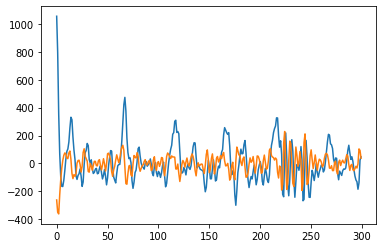

In [208]:
#plt.plot(xfilt[0:300]/1000)
plt.plot(d1x[0:300])
plt.plot(d2x[0:300])

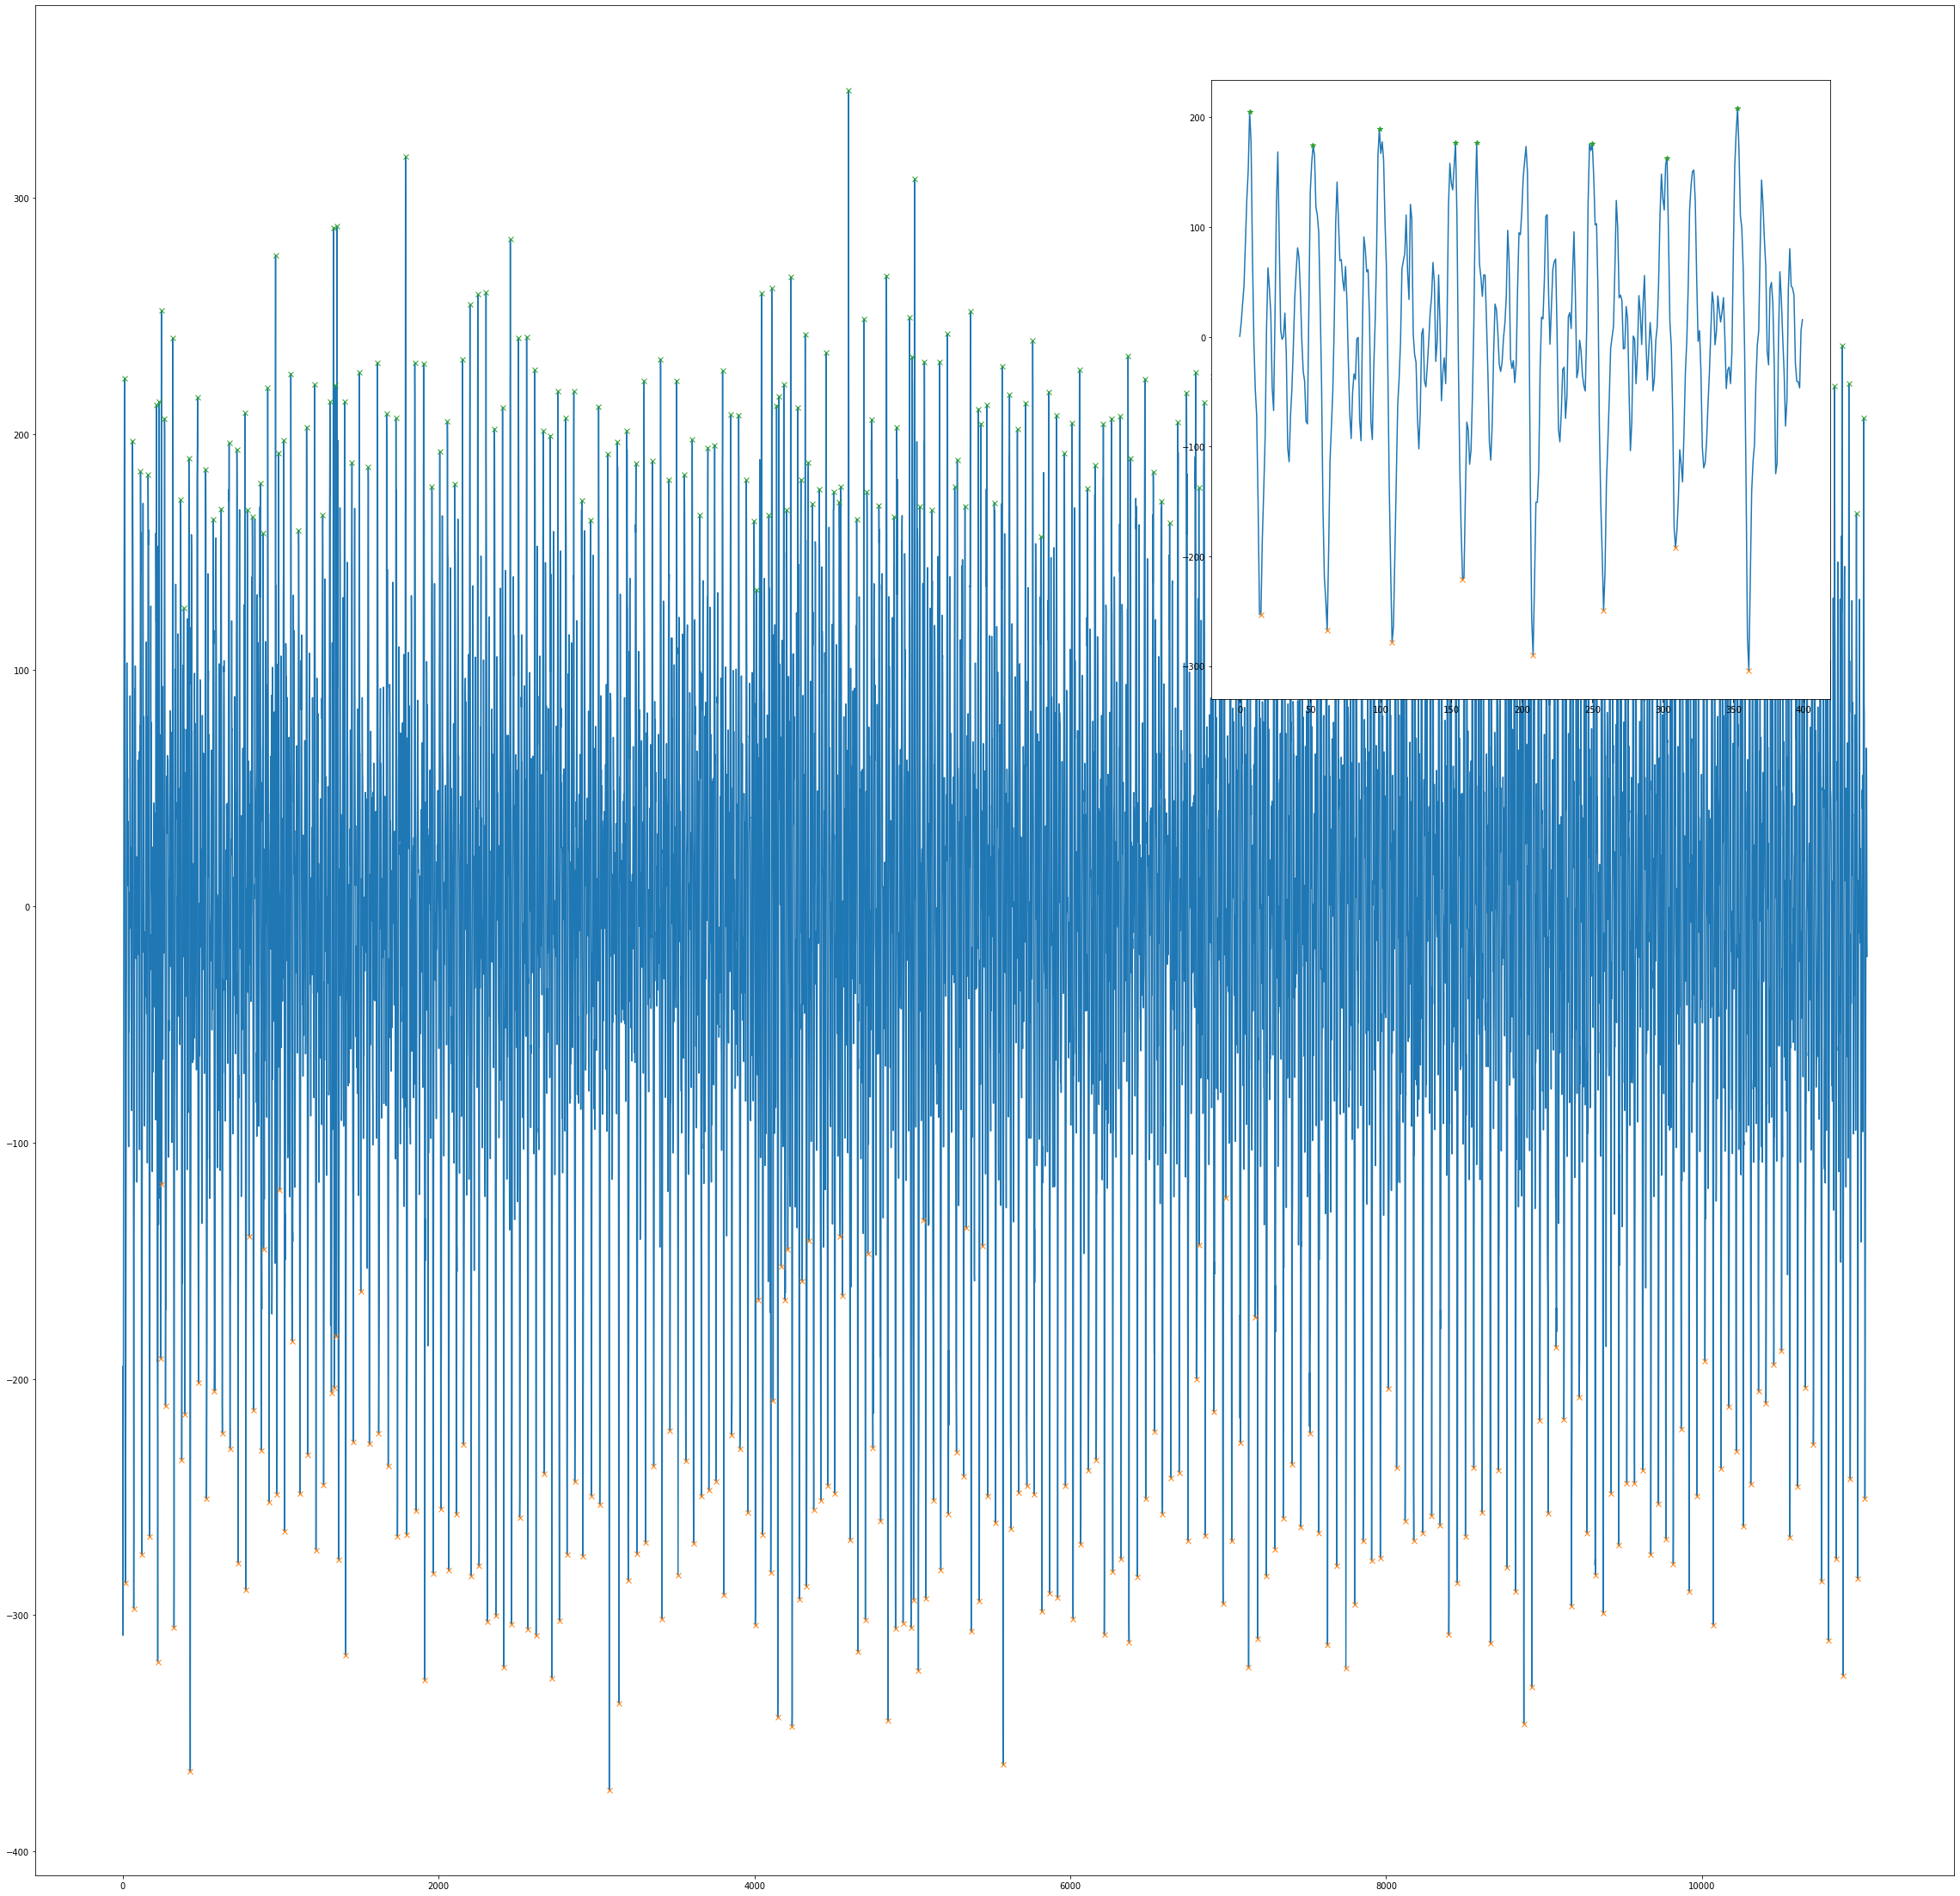

In [191]:
min2, max2 = find_peak_set(d2x, prominence=300, width= 2)

plt.figure(figsize=(40,40))
plt.plot(d2x)
plt.plot(min2, d2x[min2], 'x')
plt.plot(max2, d2x[max2],'x')

start = 9710
stop = 10110
d2xdetail = d2x[start:stop]

submin2 = [i - start for i in min2 if i >= start and i < stop]
submax2 = [i - start for i in max2 if i >= start and i < stop]
sub_axes2 = plt.axes([.6, .6, .25, .25]) 
sub_axes2.plot(d2xdetail) 
sub_axes2.plot(submin2, d2xdetail[submin2], 'x') 
sub_axes2.plot(submax2, d2xdetail[submax2], '*') 

In [192]:
np.diff(min2)

array([52, 51, 50, 51, 20,  6, 23, 54, 49, 20, 34, 52, 51, 50, 50, 49, 51,
       49, 20, 29, 48, 15, 35, 50, 18, 30, 49, 48, 49, 53, 48, 50, 17, 14,
       15, 45, 47, 48, 54, 59, 60, 59, 58, 60, 55, 53, 49, 50, 47, 47, 48,
       50, 51, 55, 50, 50, 51, 53, 51, 52, 47, 49, 48, 49, 52, 54, 52, 60,
       61, 59, 56, 54, 52, 52, 51, 51, 49, 49, 49, 48, 44, 50, 51, 51, 52,
       46, 21, 26, 51, 15, 29, 21, 25, 18, 27, 46, 18, 27, 17, 29, 45, 43,
       46, 34, 13, 49, 49, 48, 16, 32, 49, 46, 48, 48, 50, 16, 31, 33, 13,
       49, 47, 48, 51, 46, 17, 30, 52, 20, 32, 51, 47, 50, 48, 53, 46, 49,
       49, 51, 49, 49, 48, 49, 49, 51, 54, 53, 50, 52, 53, 56, 51, 53, 52,
       56, 56, 16, 37, 55, 58, 19, 36, 56, 51, 42, 15, 56, 54, 52, 55, 57,
       57, 55, 57, 57, 59, 55, 54, 54, 55, 50, 53, 54, 55, 57, 56, 54, 55,
       54, 51, 53, 53, 52, 52, 52, 55, 53, 51, 50, 52, 52, 49, 48, 48, 50,
       53, 49, 50, 49, 51, 49, 51, 52, 49, 47, 46, 50, 50, 50, 51, 52, 50,
       48, 48, 44, 48, 49

In [194]:
np.median(np.diff(min2))

50.0

In [195]:
np.diff(min2filt)

array([52, 51, 50, 51, 49, 54, 49, 54, 52, 51, 50, 50, 49, 51, 49, 49, 48,
       50, 50, 48, 49, 48, 49, 53, 48, 50, 46, 45, 47, 48, 54, 59, 60, 59,
       58, 60, 55, 53, 49, 50, 47, 47, 48, 50, 51, 55, 50, 50, 51, 53, 51,
       52, 47, 49, 48, 49, 52, 54, 52, 60, 61, 59, 56, 54, 52, 52, 51, 51,
       49, 49, 49, 48, 44, 50, 51, 51, 52, 46, 47, 51, 44, 46, 45, 46, 45,
       46, 45, 43, 46, 47, 49, 49, 48, 48, 49, 46, 48, 48, 50, 47, 46, 49,
       47, 48, 51, 46, 47, 52, 52, 51, 47, 50, 48, 53, 46, 49, 49, 51, 49,
       49, 48, 49, 49, 51, 54, 53, 50, 52, 53, 56, 51, 53, 52, 56, 56, 53,
       55, 58, 55, 56, 51, 42, 71, 54, 52, 55, 57, 57, 55, 57, 57, 59, 55,
       54, 54, 55, 50, 53, 54, 55, 57, 56, 54, 55, 54, 51, 53, 53, 52, 52,
       52, 55, 53, 51, 50, 52, 52, 49, 48, 48, 50, 53, 49, 50, 49, 51, 49,
       51, 52, 49, 47, 46, 50, 50, 50, 51, 52, 50, 48, 48, 44, 48, 49, 47,
       50, 49, 53, 48, 48, 52, 51, 46, 47, 44, 46, 48])

### Algorithm to select the max peak 
* Step1: Select raw maxpeak based on prominent one (say:500)
* Step2: Filtering some outliners
* Step3: Select fine maxpeak based on prominent two (say:50)
* Step4: Select next peak based on first max peak

In [196]:
#Step1: Select raw maxpeak
min2, max2 = find_peak_set(d2x, prominence=300) 
#Step2: Filtering some outliners
min2filt=[]
med = np.median(np.diff(min2))
val = 0
while (val < len(min2)-1):
  idx = 1
  while min2[val+idx] - min2[val] <  0.75*med:
    idx =idx + 1
  min2filt.append(min2[val])
  val = val + idx
if min2[-1] - min2filt[-1] > 0.9*med:
  min2filt.append(min2[-1]) 
#Step3: Select fine maxpeak based on prominent two (say:50)
minfine2, maxfine2 = find_peak_set(d2x, prominence=50) ## return values are np.arrays
#update median by min2filt
med = np.median(np.diff(min2filt))

min2filt2=[]
val = 0
while (val < len(min2filt)-1):
  #if (len(min2filt) < len(minfine2))
  # find index of maxpeak in minfine2
  maxpos = list(minfine2).index(min2filt[val])
  idx = maxpos + 1
  while minfine2[idx] - minfine2[maxpos] <  0.27*med:
    idx =idx + 1
  min2filt2.append(minfine2[maxpos])
  min2filt2.append(minfine2[idx])
  val = val + 1


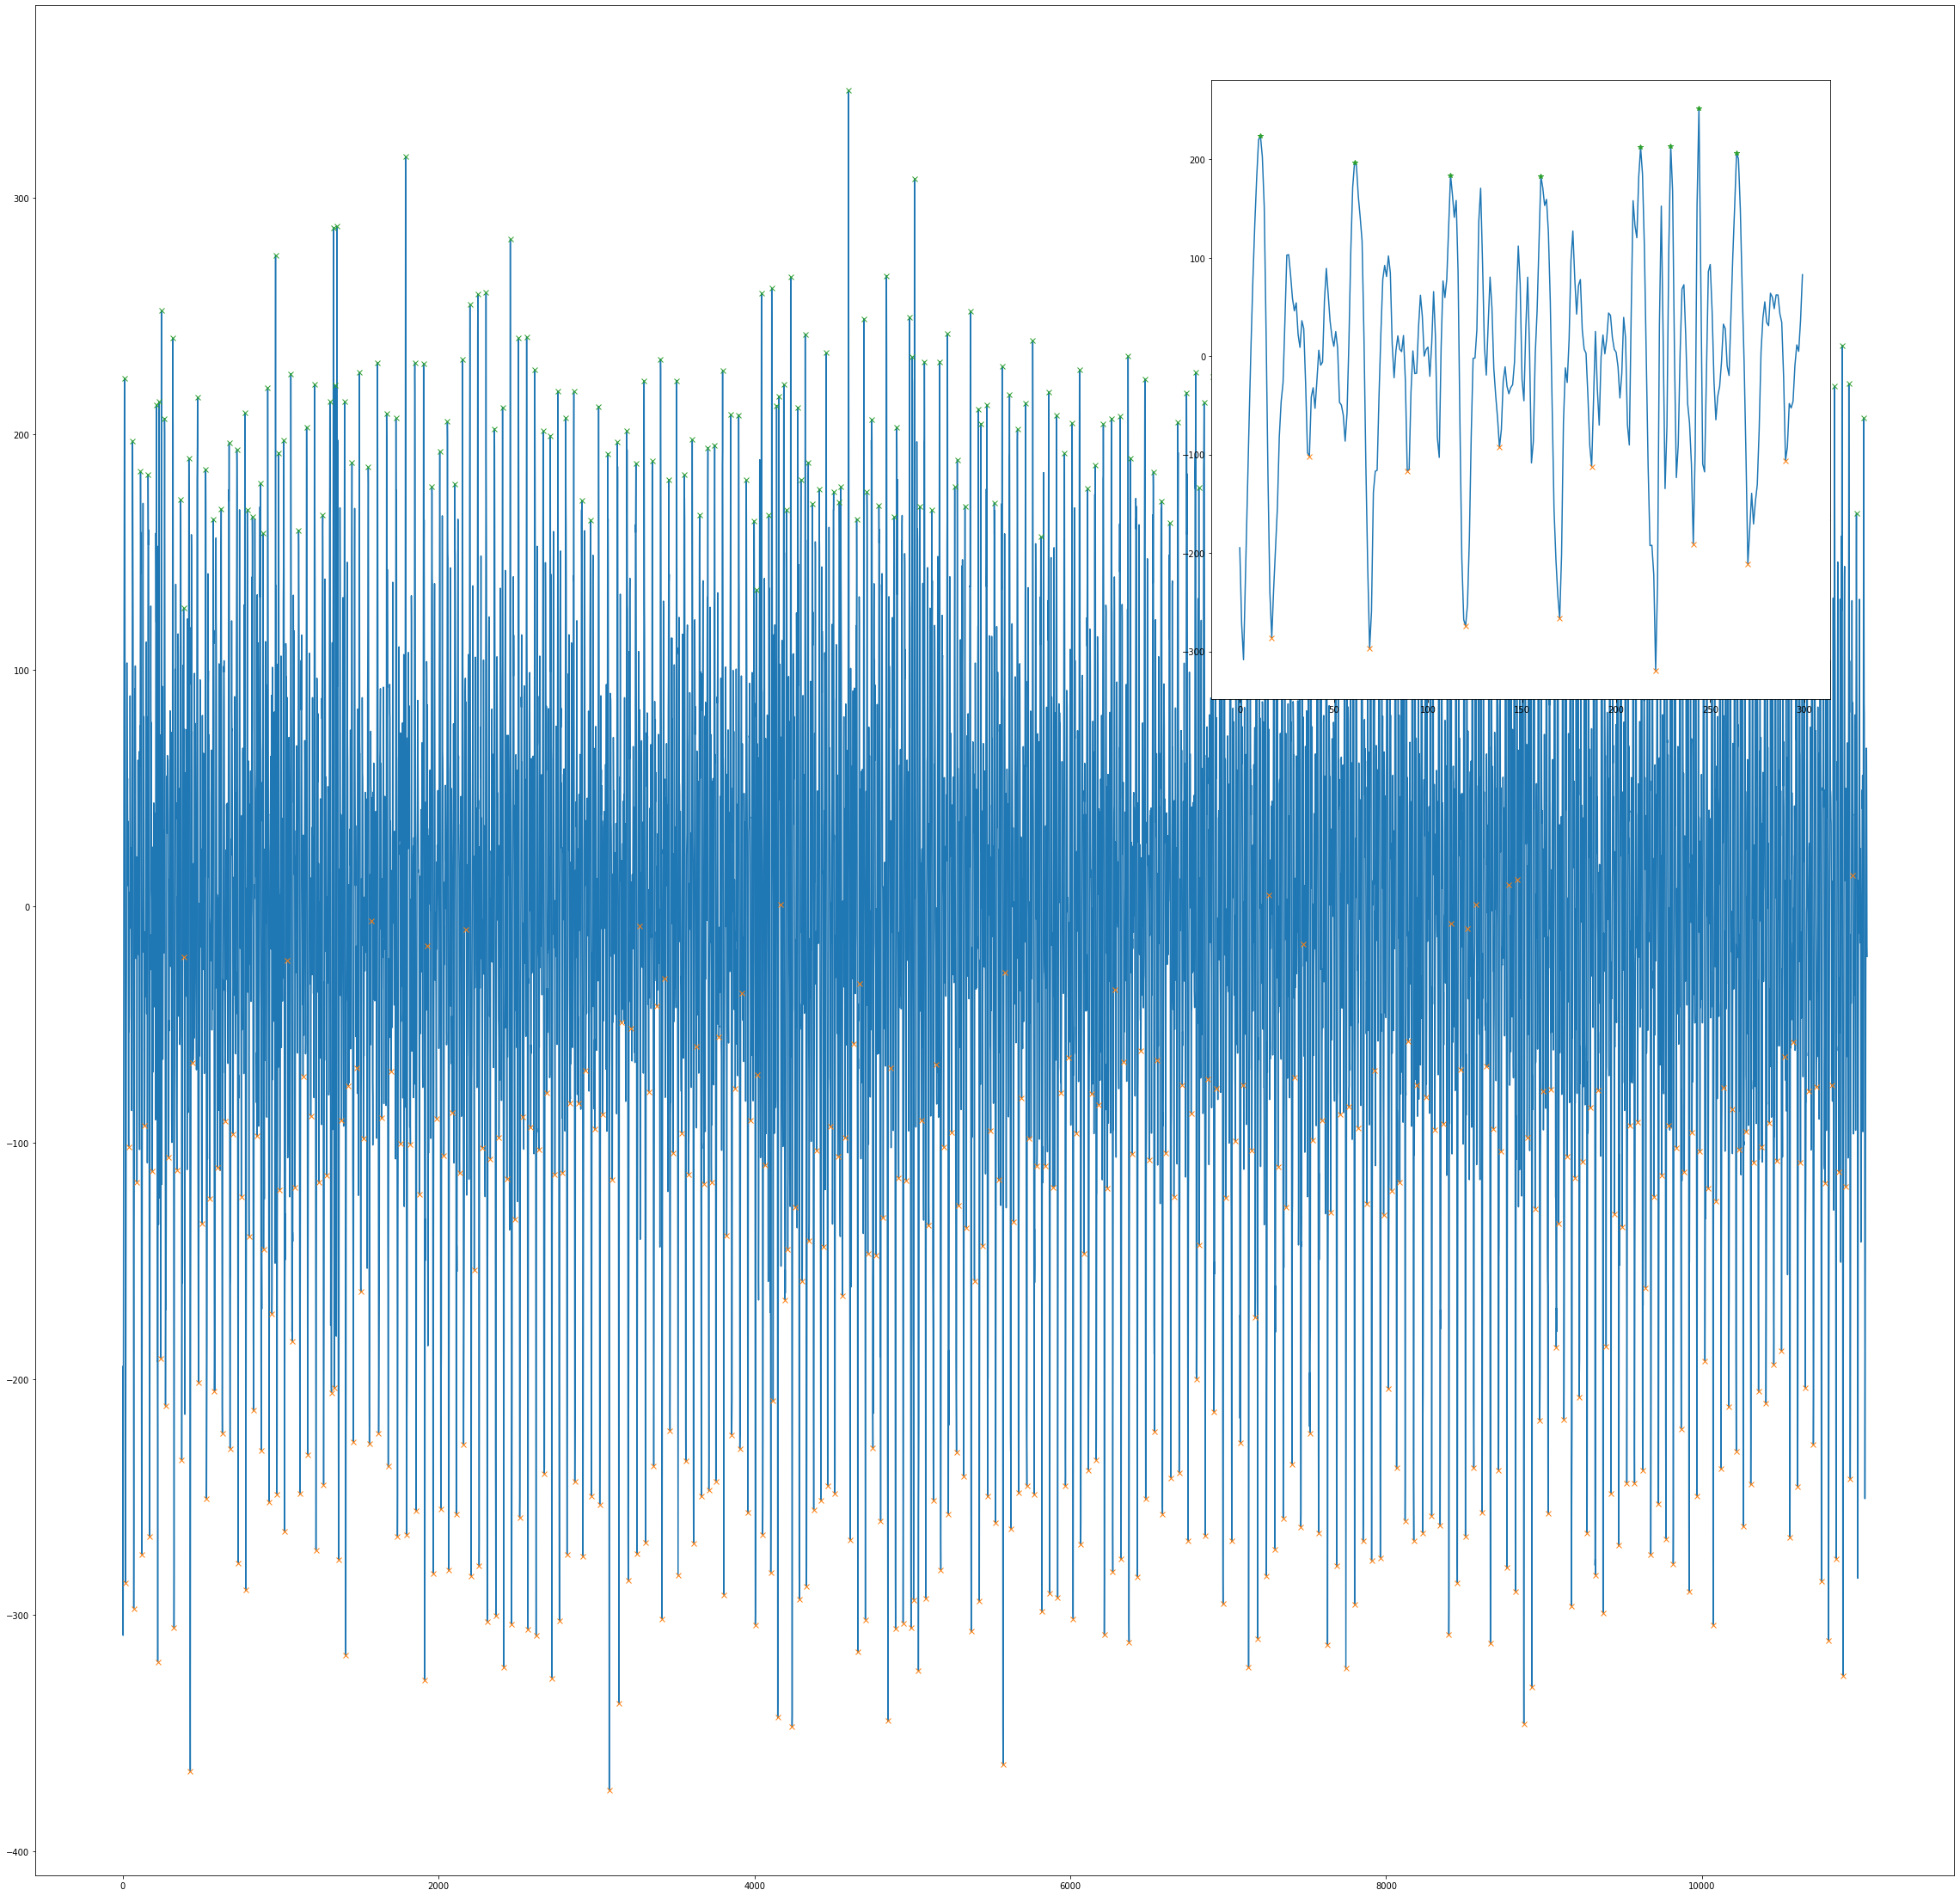

In [197]:
plt.figure(figsize=(40,40))
plt.plot(d2x)
plt.plot(min2filt2, d2x[min2filt2], 'x')
plt.plot(max2, d2x[max2],'x')

start = 0
stop = 300
d2xdetail = d2x[start:stop]

submin2 = [i - start for i in min2filt2 if i >= start and i < stop]
submax2 = [i - start for i in max2 if i >= start and i < stop]
sub_axes2 = plt.axes([.6, .6, .25, .25]) 
sub_axes2.plot(d2xdetail) 
sub_axes2.plot(submin2, d2xdetail[submin2], 'x') 
sub_axes2.plot(submax2, d2xdetail[submax2], '*') 

In [198]:
np.diff(min2filt)

array([52, 51, 50, 51, 49, 54, 49, 54, 52, 51, 50, 50, 49, 51, 49, 49, 48,
       50, 50, 48, 49, 48, 49, 53, 48, 50, 46, 45, 47, 48, 54, 59, 60, 59,
       58, 60, 55, 53, 49, 50, 47, 47, 48, 50, 51, 55, 50, 50, 51, 53, 51,
       52, 47, 49, 48, 49, 52, 54, 52, 60, 61, 59, 56, 54, 52, 52, 51, 51,
       49, 49, 49, 48, 44, 50, 51, 51, 52, 46, 47, 51, 44, 46, 45, 46, 45,
       46, 45, 43, 46, 47, 49, 49, 48, 48, 49, 46, 48, 48, 50, 47, 46, 49,
       47, 48, 51, 46, 47, 52, 52, 51, 47, 50, 48, 53, 46, 49, 49, 51, 49,
       49, 48, 49, 49, 51, 54, 53, 50, 52, 53, 56, 51, 53, 52, 56, 56, 53,
       55, 58, 55, 56, 51, 42, 71, 54, 52, 55, 57, 57, 55, 57, 57, 59, 55,
       54, 54, 55, 50, 53, 54, 55, 57, 56, 54, 55, 54, 51, 53, 53, 52, 52,
       52, 55, 53, 51, 50, 52, 52, 49, 48, 48, 50, 53, 49, 50, 49, 51, 49,
       51, 52, 49, 47, 46, 50, 50, 50, 51, 52, 50, 48, 48, 44, 48, 49, 47,
       50, 49, 53, 48, 48, 52, 51, 46, 47, 44, 46, 48])

In [199]:
np.median(np.diff(minfine2)),np.median(np.diff(min2filt))

(14.0, 50.0)

In [200]:
len(min2filt), len(minfine2)

(217, 863)

In [201]:
np.diff(min2filt2)

array([20, 32, 20, 31, 18, 32, 17, 34, 20, 29, 20, 34, 18, 31, 15, 39, 14,
       38, 21, 30, 20, 30, 20, 30, 19, 30, 19, 32, 20, 29, 20, 29, 21, 27,
       15, 35, 18, 32, 18, 30, 14, 35, 17, 31, 20, 29, 20, 33, 18, 30, 20,
       30, 17, 29, 18, 27, 16, 31, 21, 27, 16, 38, 15, 44, 18, 42, 20, 39,
       18, 40, 24, 36, 20, 35, 15, 38, 20, 29, 19, 31, 21, 26, 21, 26, 14,
       34, 19, 31, 20, 31, 20, 35, 20, 30, 20, 30, 19, 32, 19, 34, 17, 34,
       17, 35, 16, 31, 20, 29, 20, 28, 18, 31, 23, 29, 17, 37, 20, 32, 19,
       41, 19, 42, 15, 44, 19, 37, 15, 39, 20, 32, 19, 33, 14, 37, 18, 33,
       23, 26, 16, 33, 15, 34, 16, 32, 16, 28, 20, 30, 19, 32, 22, 29, 14,
       38, 17, 29, 15, 32, 15, 36, 15, 29, 16, 30, 18, 27, 19, 27, 18, 27,
       17, 29, 18, 27, 16, 27, 19, 27, 19, 28, 17, 32, 22, 27, 14, 34, 16,
       32, 19, 30, 16, 30, 15, 33, 20, 28, 18, 32, 16, 31, 18, 28, 17, 32,
       16, 31, 17, 31, 19, 32, 14, 32, 17, 30, 21, 31, 20, 32, 20, 31, 19,
       28, 14, 36, 17, 31

In [202]:
a = [ min2filt2[2*val+1] - min2filt2[2*val] for val in range(len(min2filt2)//2)]
a1 = a[0:len(a)//2]
a2 = a[len(a)//2:-1]
np.std(a1), np.mean(a1),np.std(a2),np.mean(a2)

(2.2653795365113645, 18.083333333333332, 2.383745580101661, 19.0)

In [153]:
range(len(min2filt2)//2),len(min2filt2)

(range(0, 157), 314)